In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, root_mean_squared_error, auc, roc_curve
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('/Users/jonathanpoffenberger/Downloads/Data-Science-II-Group-Project-main 2/dataset/diabetes_012_health_indicators_BRFSS2015.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nNumber of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")
print("\nFirst few rows:")
df.head()
  

Dataset Shape: (253680, 22)

Number of Records: 253,680
Number of Features: 22

First few rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """
    Evaluate model performance with multiple metrics
    """
    # Basic metrics
    acc = accuracy_score(y_true, y_pred)
    
    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate ROC curve and AUC for each class (one-vs-rest)
    n_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        y_true_binary = (y_true == i).astype(int)
        y_score = y_pred_proba[:, i]
        fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Print results
    print(f"\n{'='*50}")
    print(f"{model_name} Evaluation Metrics:")
    print(f"{'='*50}")
    print(f"Accuracy: {acc:.4f}")
    print(f"\nDetailed Classification Report:")
    print(class_report)
    
    print(f"\nROC AUC Scores:")
    for i in range(n_classes):
        print(f"Class {i} vs Rest: {roc_auc[i]:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes (0)', 'Pre-Diabetes (1)', 'Diabetes (2)'],
                yticklabels=['No Diabetes (0)', 'Pre-Diabetes (1)', 'Diabetes (2)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i],
                label=f'ROC curve class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()

    auc_weighted_ovr = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    print(f"Average AUC (Weighted OVR): {auc_weighted_ovr:.4f}")


/Users/jonathanpoffenberger/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jonathanpoffenberger/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jonathanpoffenberger/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr


Logistic Regression Evaluation Metrics:
Accuracy: 0.8455

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736


ROC AUC Scores:
Class 0 vs Rest: 0.8152
Class 1 vs Rest: 0.7077
Class 2 vs Rest: 0.8196


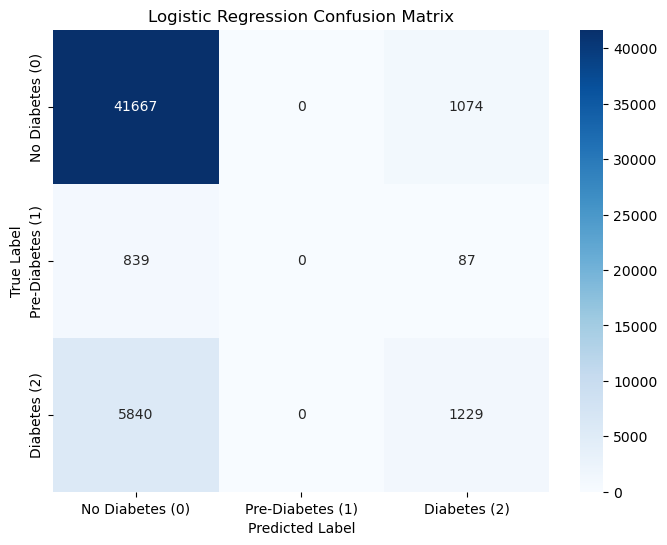

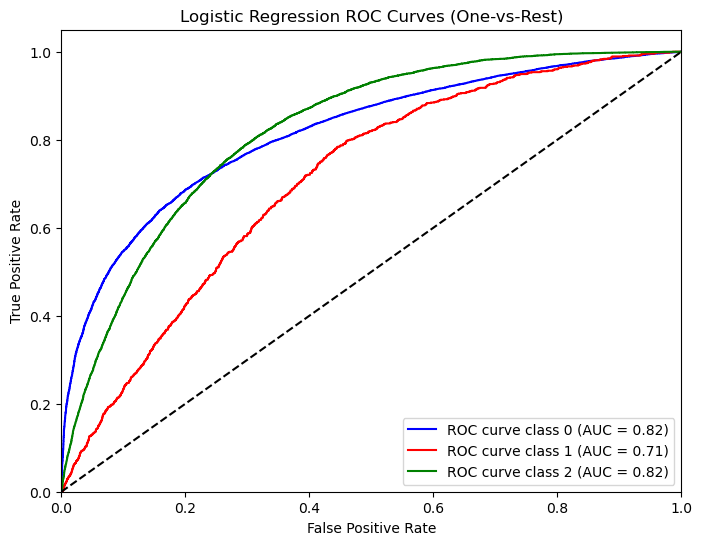

Average AUC (Weighted OVR): 0.8138


In [6]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred, y_pred_proba, "Logistic Regression")


Random Forest Evaluation Metrics:
Accuracy: 0.8428

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.50      0.20      0.28      7069

    accuracy                           0.84     50736
   macro avg       0.45      0.39      0.40     50736
weighted avg       0.80      0.84      0.81     50736


ROC AUC Scores:
Class 0 vs Rest: 0.7923
Class 1 vs Rest: 0.6286
Class 2 vs Rest: 0.7973


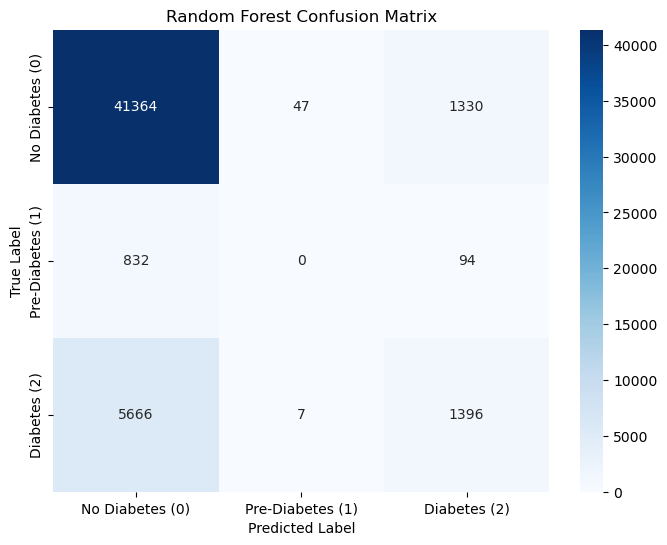

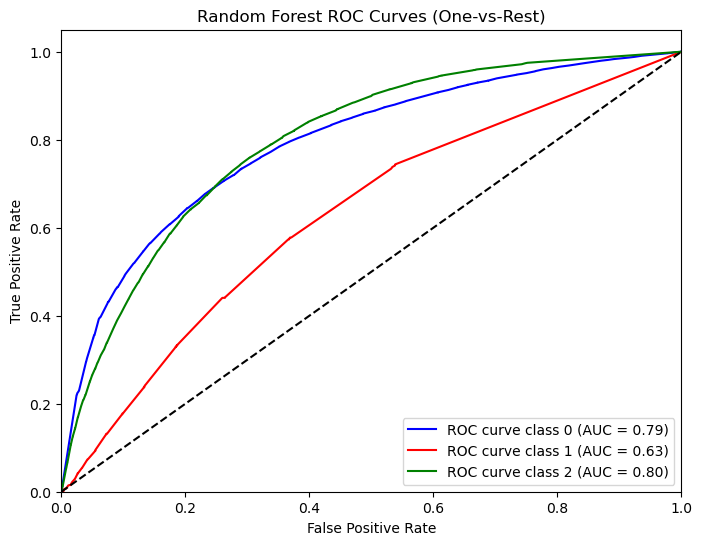

Average AUC (Weighted OVR): 0.7900


In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")


K-Nearest Neighbors Evaluation Metrics:
Accuracy: 0.8380

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.12      0.00      0.00       926
         2.0       0.44      0.15      0.22      7069

    accuracy                           0.84     50736
   macro avg       0.47      0.37      0.38     50736
weighted avg       0.79      0.84      0.80     50736


ROC AUC Scores:
Class 0 vs Rest: 0.7370
Class 1 vs Rest: 0.5271
Class 2 vs Rest: 0.7356


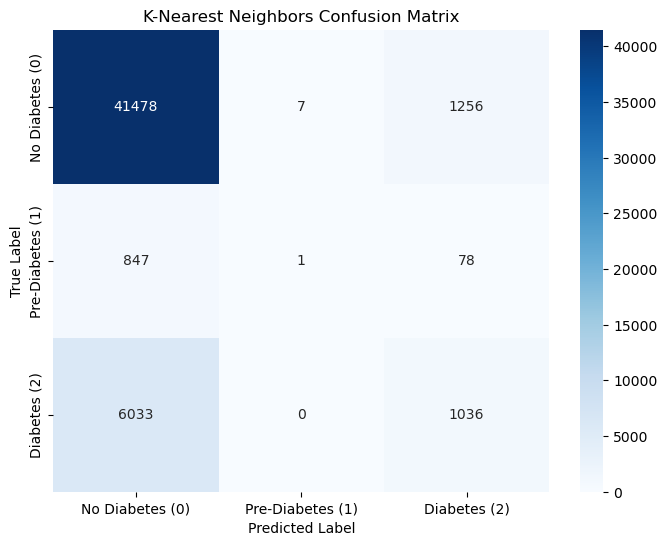

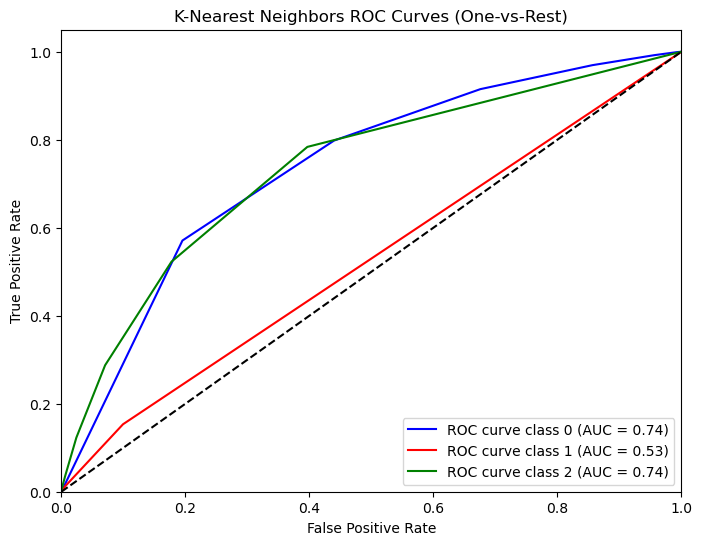

Average AUC (Weighted OVR): 0.7329


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)

# Evaluate KNN
evaluate_model(y_test, y_pred_knn, y_pred_proba_knn, "K-Nearest Neighbors")

# # Print overall AUCs for KNN
# try:
#     auc_macro = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr', average='macro')
#     auc_weighted = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr', average='weighted')
#     auc_micro = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr', average='micro')
#     print(f"KNN Overall AUC OVR (macro): {auc_macro:.4f}")
#     print(f"KNN Overall AUC OVR (weighted): {auc_weighted:.4f}")
#     print(f"KNN Overall AUC OVR (micro): {auc_micro:.4f}")
# except Exception as e:
#     print('Could not compute overall AUC for KNN:', e)